# Creating pie and donut pie charts with Matplotlib in Python

> _Zeydy Ortiz, Ph. D. @ DataCrunch Lab, LLC - @DrZeydy_

Pie charts may be out of style but business users like them.  They convey information in a fast, familiar format.  When used properly they can be very effective in highlighting the information they intend to convey.

I recently wanted to create quick visualizations for <a href="https://devpost.com/software/gerrybot"> GErryBot</a> including metrics like **percent scrapped** and **percent complete**.  These metrics are a natural fit for pie charts since they represent a part of a whole.
![percent scrapped](https://s3.amazonaws.com/gerrybot/scrapped-A176258326-2017-06-14.jpg)
![percent complete](https://s3.amazonaws.com/gerrybot/perc_completed-E96253661-2017-05-31.jpg)

Being new to Matplotlib, I used my Google-fu skills to find out how to do it.  I found several resources, including the Matplotlib website, but it took a lot of experimentation to get the charts just like I wanted.  I wished I had resources like the many posts I have found for ggplot (in R) that show the effect of tweaks to the chart.  So, inspired by Tim Hopper's http://pythonplot.com and the generosity of strangers in the Internet, I decided to create my own resource to pay it forward.  

In this tutorial, I will recreate the pie chart displaying **Percent Products Scrapped**.  I will use code for a basic pie chart and will modify different parts to see the effect on my chart.  Along the way, there are links to the resources I used.  After the **Percent Products Scrapped** pie chart is recreated, I will change it into a donut chart for illustration purposes.  This tutorial is intended for beginners.



## Simple pie chart

To create a  pie chart, all we need is a numerical list of the values to be plotted.
The matplotlib manual page for pie charts is at: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

The call is as follows: <br>
`matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)`

Note that you only need to specify the **x** (required), all other parameters have a default value.

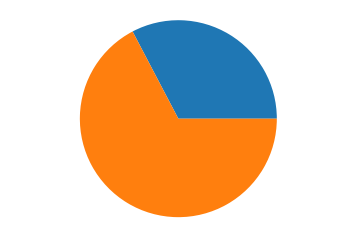

In [1]:
import matplotlib.pyplot as plt

# Data to plot
x = [17,35]

# Create simple pie chart
plt.pie (x)

# Plot
plt.axis('equal')
plt.show()

## Basic pie chart

The simple plot is not exactly the way I want it to look. I found a tutorial at https://pythonspot.com/en/matplotlib-pie-chart/ that had many of the basic features I needed.  I used their code as the basis of my charts.
Here is the original code:

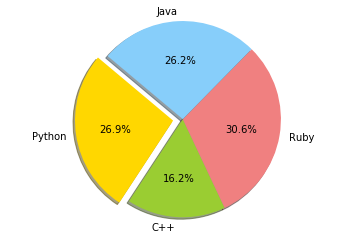

In [2]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)

# Plot
plt.axis('equal')
plt.show()

This basic chart shows a few features:
* offsetting a slice with "explode"
* slice labels
* auto-labeling the percentage with formatting
* drop-shadow
* custom start angle

There are some things that I need to change to create the pie chart I want.  So, let's change one thing at a time and see the effect.

### `counterclock`

First thing to note is that the data is plotted counter-clockwise by default.  This is odd to me so, let's plot it clockwise instead.  

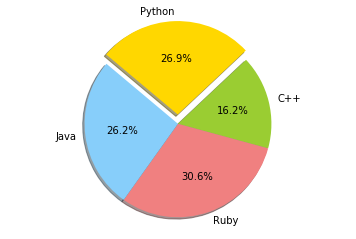

In [3]:
# Plot
# Set counterclock = False to plot data clockwise
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, counterclock = False)
 
plt.axis('equal')
plt.show()

### `startangle`

The default start angle is 0 (3 o'clock position).  However, I think that starting at 90 degrees (12 o'clock) makes it easier to interpret the percentage, at least for the first data point.  With this small change we will see that the percentage of 'Python' makes sense ~ about a quarter!

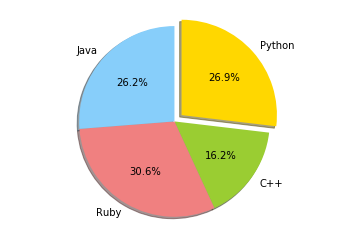

In [4]:
# Plot
# Set startangle = 90
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, counterclock = False)
 
plt.axis('equal')
plt.show()

### `explode` & `shadow`

The original example had an array-like variable `explode = (0.1, 0, 0, 0)` that moved the first slice out away from the center of the chart 0.1 fractions of the radius.  If we eliminate `explode` from the call to the pie function, all the slices stay together by default.

Another default value that I prefer is `shadow = False`.

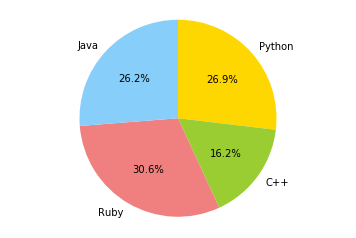

In [5]:
# Plot
# eliminate explode and shadow
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90, counterclock = False)
 
plt.axis('equal')
plt.show()

### `wedgeprops`

I had an issue with the edges of the slices.  In my Windows system, the edges were not shown.  But when I moved the chart functions to a Linux system, the edges appeared.  So, I had to find a way to eliminate them by setting the `linewidth` to 0 in `wedgeprops`.  I couldn't find additional documentation for `wedgeprops` to see what else I could do with it.

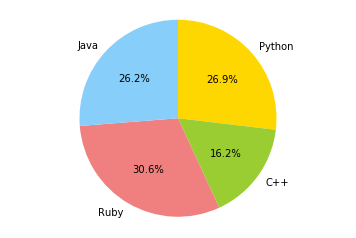

In [6]:
# Plot
# Set linewidth to 0 in wedgeprops
plt.pie(sizes, labels=labels, colors=colors, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0}  )
 
plt.axis('equal')
plt.show()

This pie chart is almost the way I need it to be.  Before, making other tweaks, let's see what other options to the `pie()` function call do before finalizing the chart.

### `frame`
Plot the axis around the pie chart by setting `frame = True`.  Note that the pie chart is centered at (0, 0) and has a radius of 1.  `center` and `radius` can be used to change the default values. 

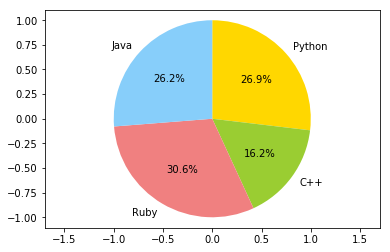

In [7]:
# Plot
# Set frame to True
plt.pie(sizes, labels=labels, colors=colors, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0}, frame = True )
 
plt.axis('equal')
plt.show()

### `tick_params()`
Usually you don't need the tick marks & labels on the axis for a pie chart but may want to have a frame around the chart.  Let's try to remove the tick marks with `tick_params()`.  Manual page: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.tick_params.html

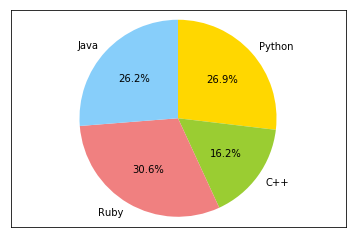

In [8]:
# Plot
# Set frame to True
plt.pie(sizes, labels=labels, colors=colors, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0}, frame = True )

plt.tick_params(
    axis='both',       # changes apply to both the x- and y-axis
    which='both',      # both major and minor ticks are affected
    left='off',        # ticks along the left edge are off
    labelleft='off',   # labels along the left edge are off
    bottom='off',      # ticks along the bottom edge are off
    labelbottom='off') # labels along the bottom edge are off
 
plt.axis('equal')
plt.show()

### `pctdistance` 
Each slice is labeled with the percent of the wedge as a whole.  The label is placed depending on the value of `pctdistance` with a default of 0.6.  Let's see how the chart looks when we change the value to 0.1.  This represent the distance from the center of the chart.

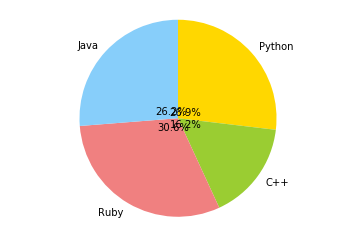

In [9]:
# Plot
# Set pctdistance to 0.1
plt.pie(sizes, labels=labels, colors=colors, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0}, pctdistance = 0.1  )
 
plt.axis('equal')
plt.show()

All the percentages are displayed in the center of the chart and, in this case, are illegible.  Let's see if we push them out by setting the value to 1.

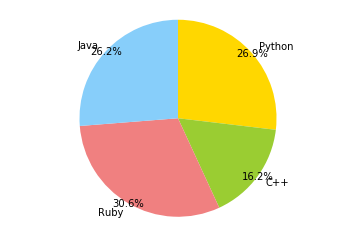

In [10]:
# Plot
# Set pctdistance to 1
plt.pie(sizes, labels=labels, colors=colors, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0}, pctdistance = 1  )
 
plt.axis('equal')
plt.show()

Now the percentages are right on the edge of the chart.  Looks much better with the default value of 0.6.

### `labeldistance`

Another value that can be changed is the `labeldistance`.  This distance is, once again, relative to the center of the chart.  The default value is 1.1 ~ 10% away from the edge of the chart.  If we make it < 1.0, the label will be on the slice.

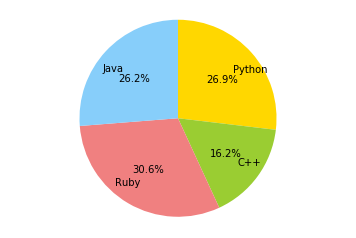

In [11]:
# Plot
# Set labeldistance to 0.75
plt.pie(sizes, labels=labels, colors=colors, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0}, labeldistance = 0.75  )
 
plt.axis('equal')
plt.show()

### `colors`
Originally, the colors to be used by the chart were specified by name.  The colors are used to fill in each of the slices.  You could also use the Hex value to make sure you get the color you want.  If `colors = None`, matplotlib uses the colors in the current rotation.

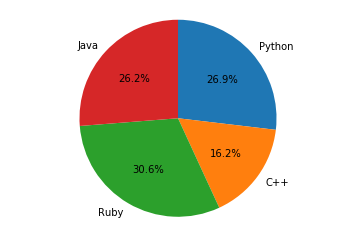

In [12]:
# Plot
# Set colors to None
plt.pie(sizes, labels=labels, colors=None, 
     autopct='%1.1f%%', startangle=90, counterclock = False,
     wedgeprops={'linewidth': 0} )
 
plt.axis('equal')
plt.show()

## Percent Products Scrapped
The datapoints for the pie chart are given by the first argument in the function call or the `x` argument, `sizes` in our example.  The function automatically calculates the percentage corresponding to each slice as a whole. So, no need to do that calculation yourself.

For the chart representing **percent scrapped** I only need two items: **Scrapped** and **Completed**.  These represent the number of products that were scrapped or that were completed, respectively.  In general, pie charts are effective with 2 or, at most, 3 items.  So, let's change the data from the original plot to something similar to what I wanted to represent.

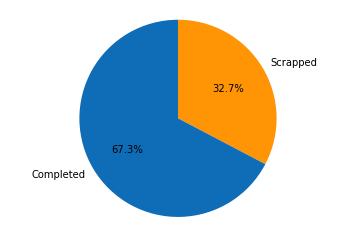

In [13]:
# Data to plot
labels = 'Scrapped', 'Completed'
scrapped = 17
completed = 35
sizes = [scrapped, completed]
colors = ['#ff9405', '#0f6cb6'] # custom colors: orange and blue

# Plot
plt.pie(sizes, labels=labels, colors=colors, wedgeprops={'linewidth': 0},
     autopct='%1.1f%%', startangle=90, counterclock = False)
 
plt.axis('equal')
plt.show()

### `title` & `suptitle`
Like any good chart, it needs a title.  I wanted to add context to the chart with a title and a supertitle.  Note the placement of these elements.  `fontsize` and `fontweight` can be used to further style the text.

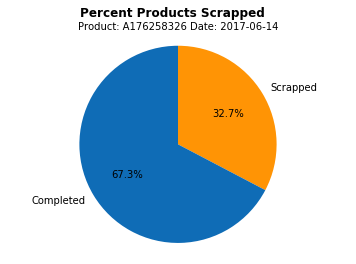

In [14]:
# Plot
plt.pie(sizes, labels=labels, colors=colors, wedgeprops={'linewidth': 0},
     autopct='%1.1f%%', startangle=90, counterclock = False)
 
# Add title
plt.title('Product: A176258326 Date: 2017-06-14', fontsize=10)
plt.suptitle('Percent Products Scrapped', fontsize=12, fontweight='bold')

plt.axis('equal')
plt.show()

### `labels`
The `labels` are used to label the slices as we have seen throughout.  Since these charts are meant to be created automatically based on data from a live process, the number of 'Scrapped' products could be 0.  This created a problem for label placement for 2 reasons: (1) hard to tell what the percentages displayed represent, and (2) the 'Scrapped' label goes to the top of the chart and may conflict with the chart title.  Let's see what happens with an example by changing the `sizes`.  I'll add a frame to show where the labels land with respect to the frame.

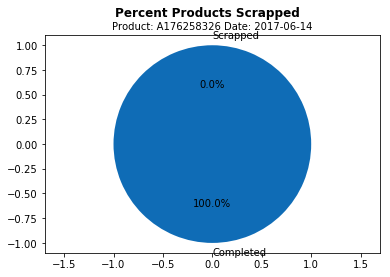

In [15]:
# Data to plot
scrapped = 0  # Make the number of scrapped items 0 to illustrate the point
completed = 32
sizes = [scrapped, completed]

# Plot adding the frame
plt.pie(sizes, labels=labels, colors=colors, wedgeprops={'linewidth': 0}, frame = True,
     autopct='%1.1f%%', startangle=90, counterclock = False)
 
plt.title('Product: A176258326 Date: 2017-06-14', fontsize=10)
plt.suptitle('Percent Products Scrapped', fontsize=12, fontweight='bold')

plt.axis('equal')
plt.show()

### Final touches

Instead of labeling the slices individually, I wanted to display the percentage of products scrapped in the middle of the chart with the actual number of products scrapped and products completed underneath.  I used `text()` to place the labels.  Determining placement and `fontsize` took several iterations.  The first two arguments to `text()` determine placement.  I ended up placing the percentage of products scrapped 0.1 points above the center and the other two labels 0.15 under the center of the pie chart.  Note that I have to calculate the percentage to use it in the text.

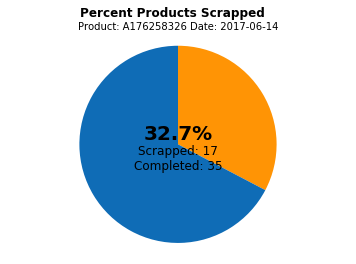

In [16]:
# import libraries
import matplotlib.pyplot as plt

# Data to plot
scrapped = 17
completed = 35
sizes = [scrapped, completed]
colors = ['#ff9405', '#0f6cb6']

# eliminate labels and autopct from pie
plt.pie(sizes, colors=colors, wedgeprops={'linewidth': 0},
      startangle=90, counterclock = False)

plt.title('Product: A176258326 Date: 2017-06-14', fontsize=10)
plt.suptitle('Percent Products Scrapped', fontsize=12, fontweight='bold')

# calculate percent and format labels 
perc = 100.0 * scrapped / float(scrapped + completed)
perclabel = '{:.1f}%'.format(perc)
bottomlabels = 'Scrapped: {}\nCompleted: {}'.format(scrapped, completed)

# place labels
plt.text (0, 0.1, perclabel, ha="center", fontsize = 20, va='center', fontweight='bold')
plt.text (0,-0.15, bottomlabels, ha="center", fontsize = 12, va='center')

plt.axis('equal')
plt.show()

## Donut pie chart
Now that we have our basic pie chart, creating a donut pie chart is just a matter of making a hole.  I found this resource useful in creating a donut pie chart: https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b  As suggested, let's impose a white circle to the pie chart to make it a donut.

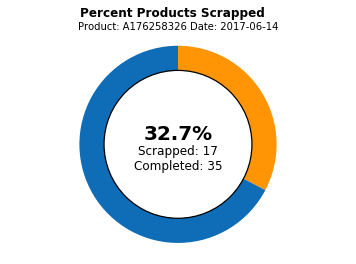

In [17]:
# Plot
plt.pie(sizes, colors=colors, wedgeprops={'linewidth': 0},
      startangle=90, counterclock = False)

plt.title('Product: A176258326 Date: 2017-06-14', fontsize=10)
plt.suptitle('Percent Products Scrapped', fontsize=12, fontweight='bold')

# calculate percent and format labels 
perc = 100.0 * scrapped / float(scrapped + completed)
perclabel = '{:.1f}%'.format(perc)
bottomlabels = 'Scrapped: {}\nCompleted: {}'.format(scrapped, completed)

# place labels
plt.text (0, 0.1, perclabel, ha="center", fontsize = 20, va='center', fontweight='bold')
plt.text (0, -.15, bottomlabels, ha="center", fontsize = 12, va='center')

# draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

### Final tweaks
Two things to tweak from the example I copied: (1) line around the donut hole and (2) size of the donut hole.  The black line around the donut hole is easy to fix.  Just change the `color` of the circle to `white`.  The size of the donut hole is determined by the second parameter in the `Circle` call.  It was set to 0.75 in the example.  I prefer to make it smaller so, let's set it to 0.6.  The final code is below:

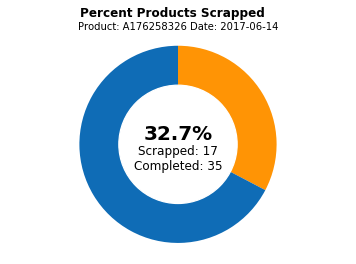

In [18]:
# import libraries
import matplotlib.pyplot as plt

# Data to plot
scrapped = 17
completed = 35
sizes = [scrapped, completed]
colors = ['#ff9405', '#0f6cb6']

# Plot
plt.pie(sizes, colors=colors, wedgeprops={'linewidth': 0},
      startangle=90, counterclock = False)
 
plt.title('Product: A176258326 Date: 2017-06-14', fontsize=10)
plt.suptitle('Percent Products Scrapped', fontsize=12, fontweight='bold')

# calculate percent and format labels 
perc = 100.0 * scrapped / float(scrapped + completed)
perclabel = '{:.1f}%'.format(perc)
bottomlabels = 'Scrapped: {}\nCompleted: {}'.format(scrapped, completed)

# place labels
plt.text (0, 0.1, perclabel, ha="center", fontsize = 20, va='center', fontweight='bold')
plt.text (0, -.15, bottomlabels, ha="center", fontsize = 12, va='center')

# draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), 0.6, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

## Additional Resource

There is now a Python Graph Gallery with examples and codes of many different chart types.  Check it out here:
https://python-graph-gallery.com/
- Pie chart: https://python-graph-gallery.com/pie-plot/
- Donut chart: https://python-graph-gallery.com/donut-plot/